In [555]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from my_gan import Generator, Discriminator

class Config:
    n_epochs = 20
    batch_size = 64
    lr = 0.0002
    b1 = 0.5        
    b2 = 0.999         
    latent_dim = 100  
    img_size = 28
    channels = 1
    sample_interval = 400

opt = Config()

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Running on device: {device}")

os.makedirs("images", exist_ok=True)
# 初始化模型
generator = Generator().to(device)
discriminator = Discriminator().to(device)
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=opt.lr, betas=(opt.b1, opt.b2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=opt.lr, betas=(opt.b1, opt.b2))


Running on device: mps


Loaded trained generator from 'generator.pth'

=== Experiment A: Random Sampling ===
Random Vector 1 (Start): [0.06,-0.15,0.59,0.57,-1.09,-0.34,0.09,2.19,-0.87,-1.04,0.96,-1.73,-0.79,-0.94,-0.33,-0.55,0.83,-1.66,-0.52,-0.80,1.56,1.80,0.98,-0.57,-1.37,-0.80,-1.29,0.18,-1.80,-0.80,-1.81,0.29,-0.67,-0.45,-0.36,0.42,1.15,0.50,0.30,-0.86,0.12,-0.88,0.36,1.08,0.09,0.39,-0.17,0.63,0.64,0.89,-0.11,1.00,0.49,-0.79,-0.79,0.08,1.97,0.35,0.85,2.07,-0.93,-0.49,1.07,1.49,-0.36,-0.22,-1.11,1.56,-0.87,-1.08,0.06,1.29,-0.03,0.94,-0.76,0.54,-2.30,-0.04,-0.04,-1.63,-0.39,-0.37,0.27,0.34,0.52,0.83,1.45,1.78,-0.40,0.04,1.03,0.79,0.41,0.61,-0.93,-0.41,-0.53,0.29,0.85,2.02]
Random Vector 2 (End): [0.32,-1.00,-2.04,1.05,-1.29,1.59,0.44,-0.02,0.87,1.69,-1.21,0.12,0.82,2.14,0.03,0.60,0.11,0.56,1.41,-0.30,0.99,-0.06,0.73,-0.06,2.26,0.58,0.70,0.15,0.65,-2.13,-2.14,0.15,-1.67,-0.92,-0.13,1.49,1.75,0.57,-1.03,1.02,2.78,-0.30,-1.30,0.48,0.16,0.58,0.82,0.84,-2.07,-0.87,1.14,-1.16,-0.83,0.12,0.86,-0.76,0.76,-1.46,-0.2

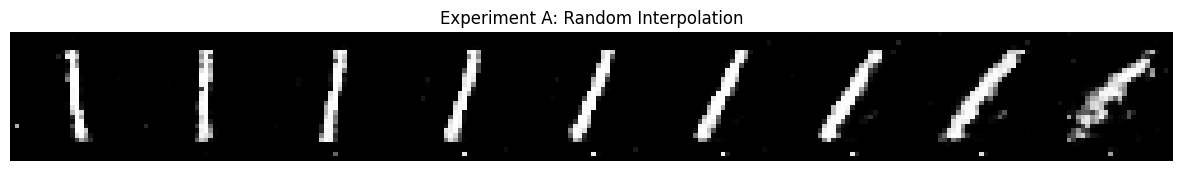


=== Experiment B: Custom Vector Arithmetic ===


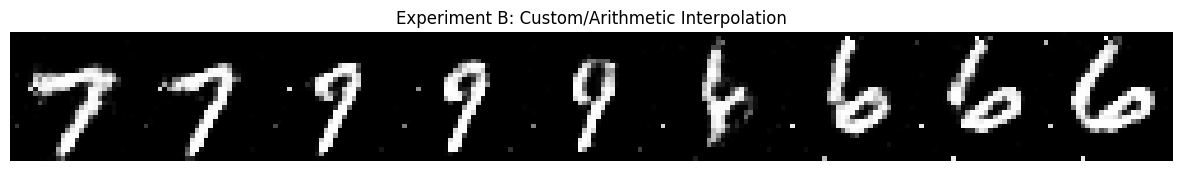

提示：尝试修改代码中的 'custom_z1' 和 'custom_z2' 来探索潜在空间！


In [ ]:
if os.path.exists("generator.pth"):
    generator.load_state_dict(torch.load("generator.pth", map_location=device))
    generator.eval() 
    print("Loaded trained generator from 'generator.pth'")
else:
    raise FileNotFoundError("Trained model 'generator.pth' not found. Please run the training cells first.")

def get_interpolation(z1, z2, steps=9):
    alphas = np.linspace(0, 1, steps)
    vectors = []
    for alpha in alphas:
        v = (1.0 - alpha) * z1 + alpha * z2
        vectors.append(v)
    return torch.stack(vectors)

def show_interpolation(z_start, z_end, title):
    z_interp = get_interpolation(z_start, z_end, steps=9).squeeze(1)
    
    with torch.no_grad():
        imgs_interp = generator(z_interp)

    grid_img = make_grid(imgs_interp, nrow=9, padding=0, normalize=True)
    
    plt.figure(figsize=(15, 3))
    plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy(), cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

print("\n=== Experiment A: Random Sampling ===")
z_random_1 = torch.randn(1, opt.latent_dim).to(device)
z_random_2 = torch.randn(1, opt.latent_dim).to(device)

vec1 = np.round(z_random_1.cpu().numpy().reshape(-1), 2).tolist()
print("Random Vector 1 (Start):", "[" + ",".join(f"{v:.2f}" for v in vec1) + "]")
vec2 = np.round(z_random_2.cpu().numpy().reshape(-1), 2).tolist()
print("Random Vector 2 (End):", "[" + ",".join(f"{v:.2f}" for v in vec2) + "]")

show_interpolation(z_random_1, z_random_2, "Experiment A: Random Interpolation")

print("\n=== Experiment B: Custom Vector Arithmetic ===")
observed_digit0 = torch.tensor([0.27,0.19,0.41,-0.76,1.83,-0.01,-1.70,1.01,-0.30,0.14,-1.20,-0.25,-0.09,-0.39,0.33,0.02,0.49,0.51,-1.86,-0.85,1.25,0.86,0.55,0.12,-0.20,-0.27,1.03,-0.19,1.09,0.08,0.76,1.37,0.86,0.91,-1.15,-0.94,0.61,-0.17,0.69,1.00,0.19,0.16,-0.90,0.62,2.02,-0.42,-0.63,-0.40,-1.85,-1.97,-0.57,0.70,0.83,1.47,1.14,0.33,-2.31,-2.27,-0.97,0.08,-1.05,-1.67,-0.08,-0.11,1.56,-0.88,-1.48,-0.29,1.26,-0.31,-1.41,1.07,-1.50,-0.03,0.41,0.30,0.24,0.99,-1.49,0.31,-2.00,0.30,0.60,-0.31,-1.24,0.29,-0.46,-0.62,-0.67,-0.34,0.03,0.00,-0.83,1.31,1.15,0.53,1.05,-0.85,-0.15,1.25]).float().to(device)
observed_digit1 = torch.tensor([1.28,0.30,0.29,-1.39,-1.18,-0.96,-0.24,1.49,0.10,-1.44,1.15,0.56,0.50,0.08,0.88,-1.59,0.17,1.04,1.28,-0.52,-0.67,0.51,-0.48,-0.79,0.68,-0.49,-0.30,-0.48,-0.20,-0.12,-0.29,1.03,-0.23,-0.00,-0.09,0.86,-0.30,-0.09,-1.66,-1.20,1.87,0.12,0.83,-0.73,0.60,1.09,1.11,0.50,-1.99,-0.80,1.94,-3.03,0.73,0.78,1.04,-0.04,-0.47,-0.77,-0.75,-0.66,0.24,1.42,1.01,0.39,-0.67,-2.18,0.68,0.63,1.30,-0.13,-1.10,-0.97,0.57,-0.98,-0.08,-0.20,1.51,1.55,-1.13,0.94,-0.08,0.18,-0.87,0.52,1.91,1.09,0.86,-0.26,2.18,-0.12,-0.91,-1.55,1.08,-0.24,0.57,1.81,1.89,-0.63,-1.62,-0.67]).float().to(device)
observed_digit2 = torch.tensor([-0.69,-0.12,0.41,-1.00,-1.76,-0.50,-0.30,0.75,1.03,0.28,-0.27,-1.16,0.47,-0.38,-0.69,0.94,0.26,-0.19,0.57,-1.12,-1.40,0.74,1.11,-0.54,-0.34,-0.45,-0.45,1.68,-0.28,-0.03,0.09,-1.16,0.84,-1.51,0.83,-0.13,2.52,1.47,-0.33,-0.13,1.07,0.24,0.71,0.01,0.92,-1.00,1.07,0.69,-0.17,-0.23,-0.82,-0.71,-0.67,-0.86,-0.63,0.22,0.99,0.93,-0.62,-0.90,-0.18,-0.35,-1.69,0.12,-0.58,0.53,1.26,-2.42,-0.24,2.78,-0.65,1.45,-0.56,-1.69,-0.40,0.07,-0.28,0.86,-0.29,-0.18,-1.48,-0.56,-0.20,0.22,0.34,1.12,1.82,0.21,-1.27,0.09,-1.57,-0.21,0.85,-1.29,0.87,-0.95,-0.32,0.57,-0.61,0.16]).float().to(device)
observed_digit3 = torch.tensor([-0.45,-3.18,1.17,-1.51,1.06,-0.64,-1.40,-0.42,0.35,-0.45,-0.21,0.51,0.22,-1.20,-1.53,-0.82,0.67,-0.24,-0.43,-0.30,0.08,1.42,0.10,-0.46,0.55,0.01,0.43,-0.99,-2.10,-0.69,0.48,0.79,1.49,-1.69,-1.49,1.46,-0.44,1.28,0.35,0.40,-1.64,-0.36,0.81,1.73,-1.55,1.52,-0.97,0.63,-0.41,-0.01,0.32,1.94,0.14,0.73,0.25,-0.36,0.03,-1.22,0.99,-1.87,-0.21,0.50,0.12,-0.83,0.64,0.08,0.22,0.30,-1.09,0.49,2.10,0.73,0.30,0.10,-1.49,-2.03,1.16,2.78,1.05,1.35,-0.52,2.17,0.13,-0.72,0.70,1.24,0.44,0.98,-0.03,-0.56,0.32,-0.67,0.79,1.11,0.73,0.31,0.56,-1.85,0.84,1.41]).float().to(device)
observed_digit4 = torch.tensor([0.38,0.97,-0.87,0.17,0.46,-0.05,-0.58,0.78,-1.03,0.65,2.34,0.87,-0.25,-1.61,0.12,-0.58,-0.34,2.33,0.77,0.06,-0.30,-0.77,-0.63,1.91,1.04,-0.27,-0.02,1.07,1.23,0.85,0.75,1.70,-0.48,-0.80,-1.31,-1.49,0.44,-0.54,-1.24,0.18,-0.58,-0.77,0.09,0.78,-0.08,0.99,-1.41,0.27,0.96,1.06,-0.80,-0.73,0.52,-0.84,-0.88,-1.27,0.92,-1.17,-0.14,0.50,-0.48,0.98,-0.33,-0.36,0.52,0.72,-0.09,-0.31,-0.80,1.40,1.96,1.94,0.57,-0.33,0.13,-0.28,0.98,-0.65,-0.42,0.88,0.03,0.12,-2.75,-0.18,-0.14,0.57,-0.98,-0.14,-1.89,0.37,0.24,-0.98,0.77,0.97,-1.13,-0.22,0.38,0.67,-2.10,-1.68]).float().to(device)
observed_digit5 = torch.tensor([0.50,0.40,-0.82,-1.61,-1.35,1.25,-0.83,-0.03,0.15,-0.01,2.50,0.08,0.24,1.24,-0.45,1.93,0.69,1.08,-0.67,0.39,-0.66,-0.25,-0.64,-0.29,-0.40,-0.57,1.26,-0.45,-0.53,1.10,-0.20,0.06,-0.43,2.08,-1.29,-0.14,1.42,0.02,-0.21,-2.30,-1.15,-0.70,1.71,-0.81,-0.06,-1.06,0.92,-0.46,-0.52,-1.20,-1.52,-0.46,-0.89,-1.97,0.28,0.34,0.30,0.73,0.54,-2.30,0.70,-1.14,1.36,0.26,-0.12,-0.66,-1.38,0.05,-0.34,0.44,0.17,-0.75,-0.35,0.33,0.35,1.49,0.14,1.86,0.64,0.63,0.49,0.51,1.22,-1.44,-0.65,2.06,1.04,1.83,0.36,-2.41,-0.36,-0.13,-0.17,-1.45,-0.41,-0.84,-1.21,0.93,-0.37,-0.16]).float().to(device)
observed_digit6 = torch.tensor([-0.36,-0.36,-1.24,0.20,0.53,0.31,-0.27,0.65,0.74,2.06,0.08,-0.91,-0.20,0.24,-1.01,-1.51,0.77,-0.15,0.29,-0.30,-1.78,-0.85,2.30,1.21,0.68,-0.30,0.92,1.41,-0.14,0.10,0.56,-0.32,1.37,0.03,1.10,0.82,-0.32,0.18,0.06,0.44,-0.55,-0.02,-0.40,0.69,-0.24,1.21,0.71,-0.35,0.85,0.55,-0.55,1.54,-0.60,-0.45,-0.62,0.25,-1.80,1.36,-0.18,2.71,-0.73,-0.68,0.12,-1.16,-0.04,-0.12,0.59,-0.16,-0.53,0.84,0.18,1.07,2.49,0.06,1.34,-0.87,1.49,0.54,-0.98,-0.44,0.45,1.01,0.12,0.40,1.74,-0.85,0.44,-0.61,0.04,-0.45,0.02,-0.36,0.84,-1.55,1.09,-0.62,-0.28,0.34,-1.17,1.09]).float().to(device)
observed_digit7 = torch.tensor([0.97,-0.64,-0.59,-0.74,-0.79,0.67,-1.58,0.47,-0.55,-0.43,-1.43,-0.67,-0.48,-0.79,-0.75,0.71,-0.11,0.20,1.64,-0.13,0.08,0.70,0.87,0.65,1.17,1.59,2.01,0.49,-1.43,-0.13,1.11,-1.63,-0.72,-1.19,-0.03,0.58,1.51,0.58,0.40,0.99,-1.63,1.16,-1.66,0.49,0.51,0.49,-0.35,1.37,0.12,-0.57,-1.61,0.90,0.20,0.59,-0.05,0.89,-1.02,1.46,1.00,-0.71,0.45,1.65,-0.04,-1.76,0.14,1.57,0.09,0.85,1.55,0.13,-2.35,-1.33,-0.79,-2.38,1.62,-0.47,-1.20,-1.07,-0.49,0.48,-0.96,0.26,-0.44,-0.49,-0.32,1.23,0.94,0.36,-1.90,-1.18,1.25,-1.33,-1.78,1.09,-0.91,0.69,0.18,0.37,1.13,1.75]).float().to(device)
observed_digit8 = torch.tensor([-2.01,-0.17,-0.55,-0.91,-0.28,-1.31,0.66,0.70,0.58,1.01,-0.50,1.05,0.94,-0.41,-0.74,-0.93,0.09,0.65,0.39,-1.43,-1.61,-1.27,1.17,0.74,-0.21,-0.94,0.12,-0.74,0.24,-0.39,-0.96,-0.41,-0.47,-1.24,0.49,-0.15,0.04,0.91,1.59,-1.52,0.13,-0.84,-0.77,-0.62,1.05,-1.57,-0.89,1.58,-0.14,0.21,-0.40,-0.22,0.63,0.03,-0.50,-1.96,-1.19,0.97,0.02,1.74,0.36,-0.85,-0.15,-0.72,-1.46,0.30,0.41,0.96,-1.39,-0.44,0.13,0.59,1.02,1.01,0.07,0.18,1.14,0.26,-0.56,1.09,-1.75,-1.14,0.75,-1.19,0.01,-1.23,-0.86,0.98,1.44,-1.24,0.60,-0.33,0.15,1.11,0.79,0.42,0.69,0.68,1.14,0.68]).float().to(device)
observed_digit9 = torch.tensor([1.11,-0.15,1.72,-2.12,-0.29,-0.25,0.50,-0.72,0.19,0.27,-0.84,-0.98,1.67,0.13,0.37,-0.26,0.95,1.83,0.30,0.70,0.22,0.45,-0.82,-1.87,-1.86,3.14,-0.86,-0.02,-0.59,-2.05,0.32,-0.03,-2.83,-1.90,1.23,-1.01,0.38,-1.10,-1.86,0.19,0.22,-0.37,1.42,-0.99,0.90,0.28,0.59,0.43,-0.45,-0.87,0.47,0.65,-0.75,-0.54,1.81,1.90,-0.45,-1.68,-1.19,1.89,-0.14,0.13,0.15,-1.84,1.03,-0.40,-1.14,2.69,-0.15,0.88,0.02,-1.82,0.19,-1.42,1.55,0.96,1.26,-0.27,-0.83,1.23,0.16,1.34,-0.46,-0.09,-0.31,0.30,-1.21,1.52,0.55,-0.61,-0.06,0.57,2.17,0.62,-0.51,0.48,-0.07,-0.13,0.92,-0.33]).float().to(device)

jiujiu = observed_digit7 - observed_digit1 

# WTF 7 - 9 - 6 pattern?
show_interpolation(observed_digit6 + 1.2 * jiujiu, observed_digit6, "Experiment B: Custom/Arithmetic Interpolation")

print("提示：尝试修改代码中的 'custom_z1' 和 'custom_z2' 来探索潜在空间！")